# python 데이터 시각화

이번 시간에는 python 코드를 이용해서 기본적인 시각화 자료를 만들어보겠습니다.  
기본적인 데이터 시각화 라이브러리인 seaborn을 이용해서 시각화 자료를 만들어보겠습니다.

## 시각화 라이브러리 설치

In [1]:
!pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import seaborn as sns

## DB에서 데이터 읽어오기

데이터를 전처리하거나 시각화를 하려면 pandas 라이브러리를 사용하는 것이 편합니다.  
보통 DB로부터 SQL문을 사용해서 원하는 데이터만 1차적으로 가져오고,  
이를 pandas를 이용해서 가공합니다.  
우리는 DB로부터 타이타닉 데이터 셋을 읽어와서 pandas dataframe을 생성해보겠습니다.

이번 시간에는 데이터 시각화 맛보기를 하기 위해서 pandas를 사용합니다.  
pandas에 대해서는 세미 프로젝트 이후에 따로 자세히 배워볼 예정입니다.  
pandas 문법 자체에 너무 신경쓰지 말고 따라와주세요!

In [4]:
import pymysql 

conn = pymysql.connect(
    host="127.0.0.1",
    user="root",
    password="1234",
    database="multicampus",
)

In [5]:
import pandas as pd

def read_data(sql):
    return pd.read_sql(sql, conn)

In [6]:
select_sql = """
SELECT
    *
FROM
    titanic
"""

In [8]:
df = read_data(select_sql)

/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_55144/2984245492.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


## bar graph

막대 그래프는 가장 기본적인 시각화로 주로 빈도 수를 시각화할 때 사용합니다.

### 생존자와 사망자

In [106]:
sql = """
SELECT
    Survived,
    COUNT(*) AS cnt
FROM
    titanic
GROUP BY
    Survived
"""
df = read_data(sql)
df

/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_55144/2984245492.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


,Survived,cnt
0,0,549
1,1,342


[Text(0.5, 1.0, 'Survived, Unsurvived')]

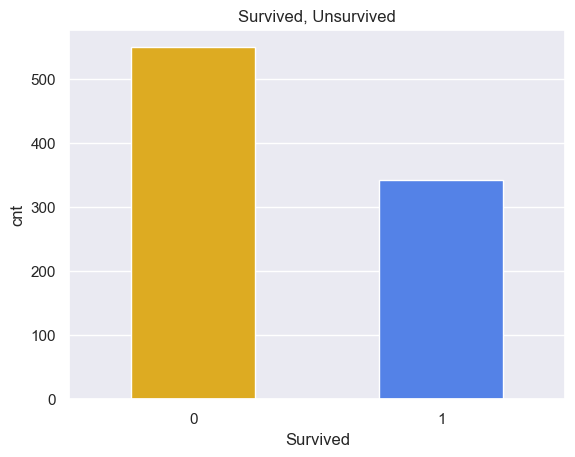

In [115]:
sns.set_style("darkgrid")
fig = sns.barplot(
    data=df,
    x="Survived",
    y="cnt",
    width=0.5,
    palette=["#fcba03", "#3b79ff"]
)
fig.set(title="Survived, Unsurvived")

### 생존자, 사망자별 남성, 여성 탑승객 수

In [30]:
sql = """
SELECT
    Survived,
    Sex,
    COUNT(*) AS cnt
FROM
    titanic
GROUP BY
    Survived,
    Sex
"""
df = read_data(sql)
df

/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_55144/2984245492.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


,Survived,Sex,cnt
0,0,female,81
1,0,male,468
2,1,female,233
3,1,male,109


<Axes: xlabel='Sex', ylabel='cnt'>

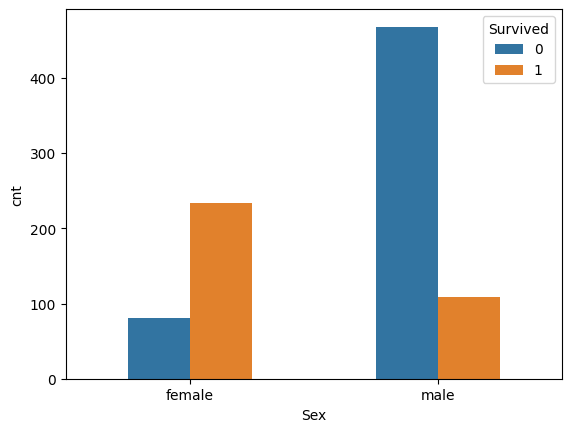

In [32]:
sns.barplot(
    data=df,
    x="Sex",
    y="cnt",
    hue="Survived",
    width=0.5
)

### 승선지 별 탑승객

In [34]:
sql = """
SELECT
    Embarked,
    COUNT(*) AS cnt
FROM
    titanic
WHERE
    Embarked IS NOT NULL
GROUP BY
    Embarked
"""
df = read_data(sql)
df

/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_55144/2984245492.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


,Embarked,cnt
0,C,168
1,Q,77
2,S,644


<Axes: xlabel='Embarked', ylabel='cnt'>

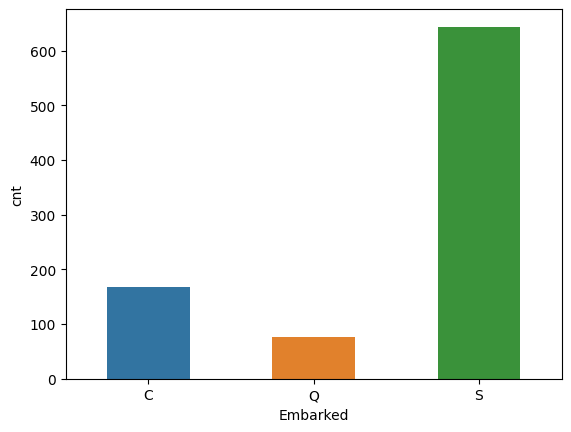

In [35]:
sns.barplot(
    data=df,
    x="Embarked",
    y="cnt",
    width=0.5
)

### 승선지, 좌석 등급별 탑승객

In [36]:
sql = """
SELECT
    Embarked,
    Pclass,
    COUNT(*) AS cnt
FROM
    titanic
WHERE
    Embarked IS NOT NULL
GROUP BY
    Embarked,
    Pclass
"""
df = read_data(sql)
df

/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_55144/2984245492.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


,Embarked,Pclass,cnt
0,C,1,85
1,C,2,17
2,C,3,66
3,Q,1,2
4,Q,2,3
5,Q,3,72
6,S,1,127
7,S,2,164
8,S,3,353


<Axes: xlabel='Embarked', ylabel='cnt'>

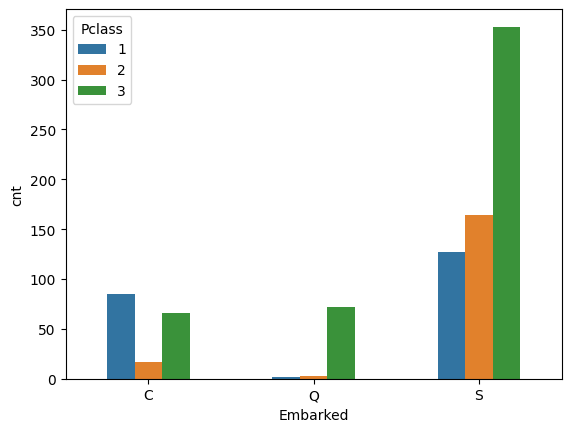

In [38]:
sns.color_palette("pastel")
fig = sns.barplot(
    data=df,
    x="Embarked",
    y="cnt",
    hue="Pclass",
    width=0.5
)
fig.set()

## 연습 문제

1. 생존 여부에 따른 각 좌석 등급별 탑승객 수를 bar 그래프로 표현하세요.
2. 각 좌석 등급별로 남성 탑승객과 여성 탑승객 수를 bar 그래프로 표현하세요.

In [39]:
sql = """
SELECT
    Survived,
    Pclass,
    COUNT(*) AS cnt
FROM
    titanic
GROUP BY
    Survived,
    Pclass
"""
df = read_data(sql)
df

/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_55144/2984245492.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


,Survived,Pclass,cnt
0,0,1,80
1,0,2,97
2,0,3,372
3,1,1,136
4,1,2,87
5,1,3,119


[]

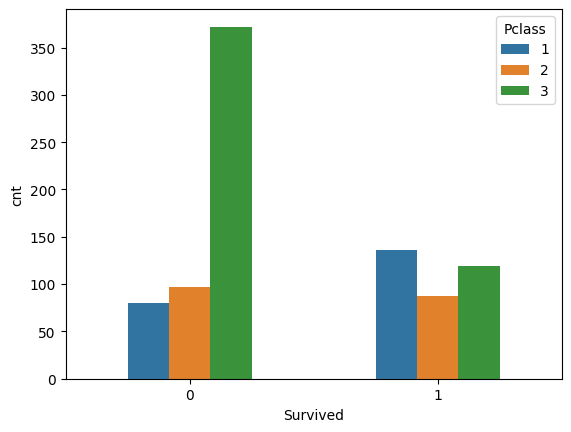

In [40]:
fig = sns.barplot(
    data=df,
    x="Survived",
    y="cnt",
    hue="Pclass",
    width=0.5
)
fig.set()

In [47]:
sql = """
SELECT
    Pclass,
    Sex,
    COUNT(*) AS cnt
FROM
    titanic
GROUP BY
    Pclass,
    Sex
ORDER BY
    Pclass,
    Sex
"""
df = read_data(sql)
df

/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_55144/2984245492.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


,Pclass,Sex,cnt
0,1,female,94
1,1,male,122
2,2,female,76
3,2,male,108
4,3,female,144
5,3,male,347


[]

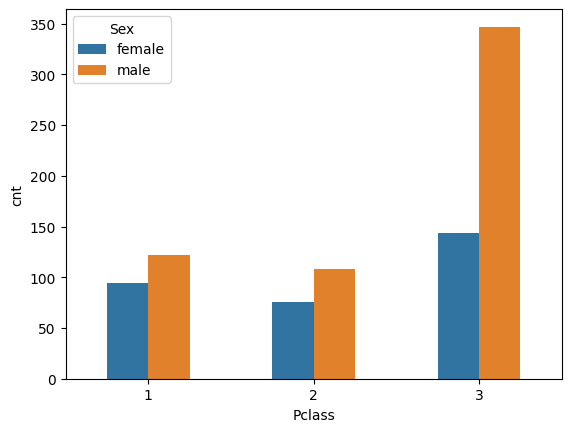

In [48]:
fig = sns.barplot(
    data=df,
    x="Pclass",
    y="cnt",
    hue="Sex",
    width=0.5
)
fig.set()

## 히스토그램

히스토그램이란 자료의 구간을 나눠서 빈도 수를 집계하는 대표적인 시각화 유형입니다. 주로 연속형 자료의 분포를 시각화 할 때 사용합니다. 자료의 분포에 대해서 상당한 인사이트를 제공해주어, 거의 모든 데이터 분석 시에 활용됩니다.

### 운임 히스토그램

승객들이 지불한 운임의 histogram을 그려보겠습니다.

In [49]:
sql = """
SELECT
    Fare,
    Pclass
FROM
    titanic
"""
df = read_data(sql)
df

/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_55144/2984245492.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


,Fare,Pclass
0,7.2500,3
1,71.2833,1
2,7.9250,3
3,53.1000,1
4,8.0500,3
...,...,...
886,13.0000,2
887,30.0000,1
888,23.4500,3
889,30.0000,1


<Axes: xlabel='Fare', ylabel='Count'>

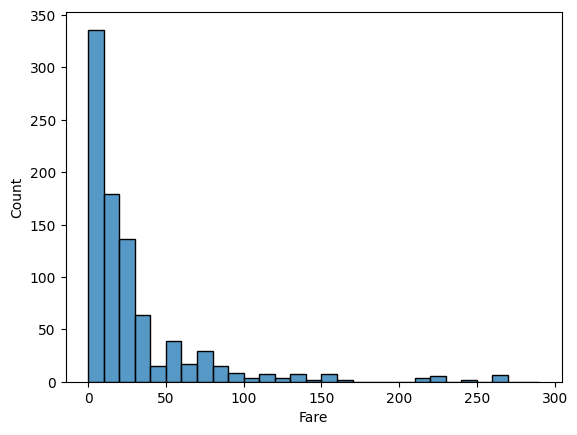

In [55]:
sns.histplot(
    data=df,
    x="Fare",
    bins=[x for x in range(0, 300, 10)]
)

### 좌석 등급별 지불 운임 히스토그램

<Axes: xlabel='Fare', ylabel='Count'>

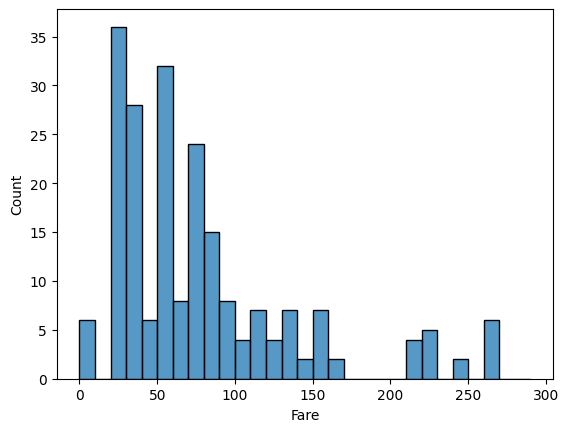

In [59]:
sns.histplot(
    data=df[df["Pclass"]==1],
    x="Fare",
    bins=[x for x in range(0, 300, 10)]
)

<Axes: xlabel='Fare', ylabel='Count'>

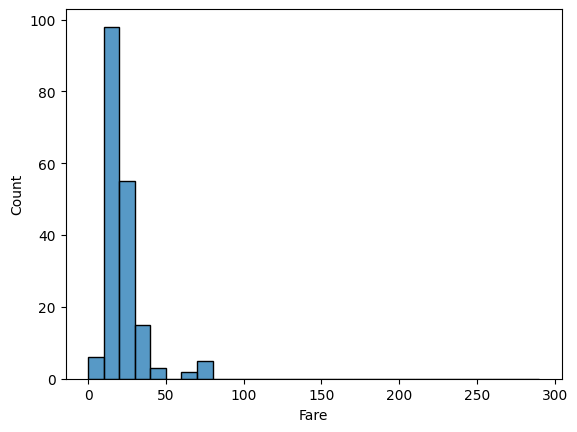

In [60]:
sns.histplot(
    data=df[df["Pclass"]==2],
    x="Fare",
    bins=[x for x in range(0, 300, 10)]
)

<Axes: xlabel='Fare', ylabel='Count'>

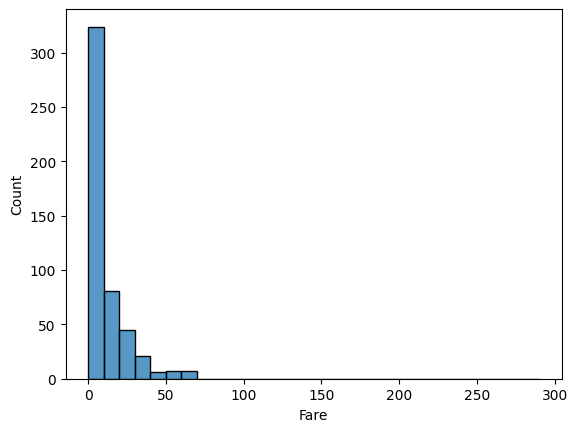

In [61]:
sns.histplot(
    data=df[df["Pclass"]==3],
    x="Fare",
    bins=[x for x in range(0, 300, 10)]
)

### 연습 문제
1. 전체 탑승객의 연령을 히스토그램으로 표현하세요.
2. 생존자의 연령 히스토그램과 사망자의 연령 히스토그램을 각각 표현하세요.

In [98]:
sql = """
SELECT
    Age,
    Survived
FROM
    titanic
"""
df = read_data(sql)
df

/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_55144/2984245492.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
...,...,...
886,27.0,0
887,19.0,1
888,NaN,0
889,26.0,1


<Axes: xlabel='Age', ylabel='Count'>

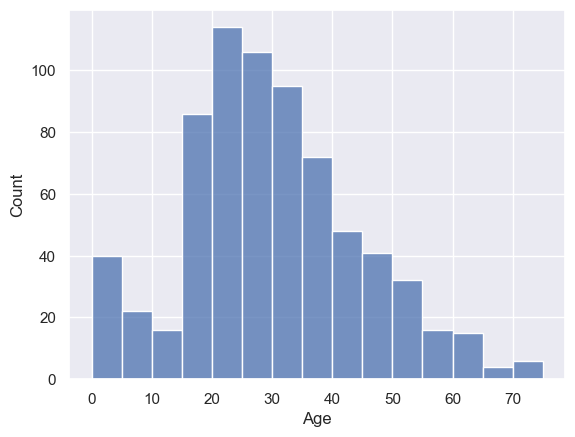

In [101]:
sns.histplot(
    data=df,
    x="Age",
    bins=[x for x in range(0, 80, 5)]
)

<Axes: xlabel='Age', ylabel='Count'>

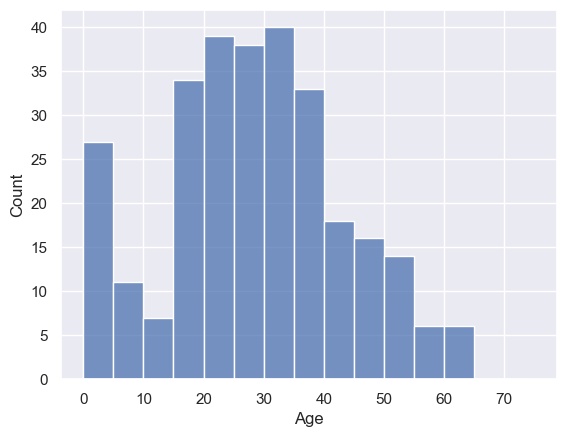

In [102]:
sns.histplot(
    data=df[df["Survived"]==1],
    x="Age",
    bins=[x for x in range(0, 80, 5)]
)

<Axes: xlabel='Age', ylabel='Count'>

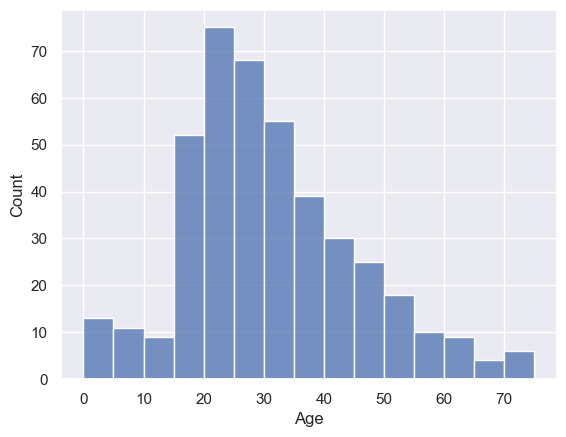

In [103]:
sns.histplot(
    data=df[df["Survived"]==0],
    x="Age",
    bins=[x for x in range(0, 80, 5)]
)

## Scatter Plot

scatter plot은 서로 다른 두 연속형 확률 변수의 관계를 시각화 할 때 사용합니다.

In [62]:
sql = """
SELECT
    Fare,
    Age
FROM
    titanic
"""
df = read_data(sql)
df

/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_55144/2984245492.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


,Fare,Age
0,7.2500,22.0
1,71.2833,38.0
2,7.9250,26.0
3,53.1000,35.0
4,8.0500,35.0
...,...,...
886,13.0000,27.0
887,30.0000,19.0
888,23.4500,NaN
889,30.0000,26.0


<Axes: xlabel='Age', ylabel='Fare'>

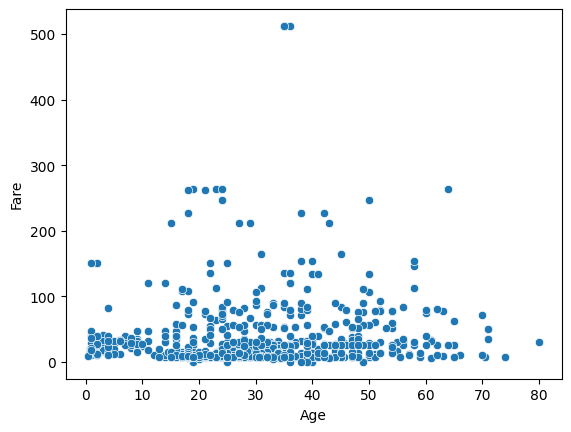

In [65]:
sns.scatterplot(
    x="Age",
    y="Fare",
    data=df
)

## Heatmap
히트맵(heatmap)은 데이터의 값에 따라 색상을 사용하여 행과 열의 관계를 시각화하는 방법입니다. 주로 2차원 데이터를 표현하기 위해 사용되며, 데이터의 패턴, 상관 관계, 변화 등을 시각적으로 파악하는 데 유용합니다.

In [66]:
sql = """
SELECT
    Survived,
    Pclass
FROM
    titanic
"""
df = read_data(sql)
df

/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_55144/2984245492.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
...,...,...
886,0,2
887,1,1
888,0,3
889,1,1


In [68]:
table = df.pivot_table(index=["Survived"], columns=["Pclass"], aggfunc="size")
table

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<Axes: xlabel='Pclass', ylabel='Survived'>

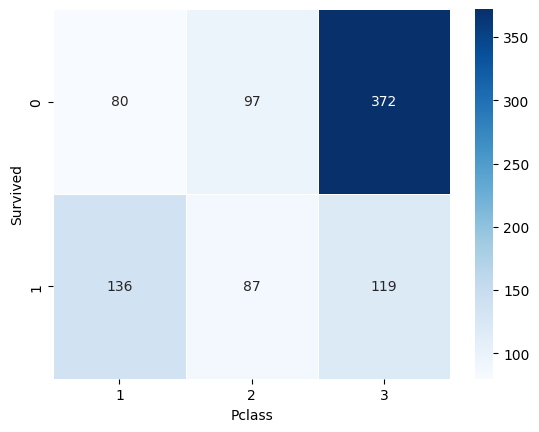

In [78]:
sns.heatmap(
    table,
    annot=True,
    fmt="d",
    linewidth=0.5,
    cmap="Blues"
)

## Boxplot

데이터의 분포를 파악할 때 요긴하게 사용되는 plot 중에 하나입니다. boxplot은 데이터 셋의 최대, 최소값, 중앙값, 전반적인 분포와 outlier의 분포를 확인하기 위해서 많이 사용됩니다. 개념을 설명드리기에 앞서서 한번 그려보겠습니다.

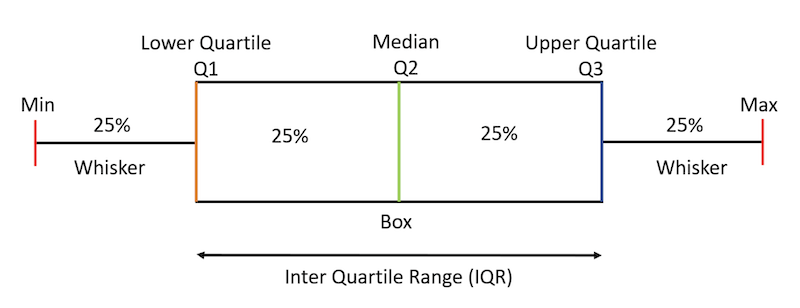

boxplot을 이해하기 위해서는 먼저 4분위수(quantile)를 이해해야 합니다. 4 분위 수란 데이터를 크기 순으로 정렬 한 뒤, 4등분을 나누어 25% 지점, 50% 지점, 75% 지점, 100% 지점에 해당하는 자료를 가져온 것입니다. 만일 5등분을 했다면 5분위수, 6등분을 했다면 6분위 수가 됩니다.

boxplot 1분위 수부터 3분위 수까지 범위를 박스로 그려줍니다. 그리고 2분위 수, 중간 값은 노란색 선으로 표시해줍니다. 박스의 길이는 IQR이라고 부릅니다.

$$IQR=Q3-Q1$$

boxplot에서 박스 위아래로 그어진 선은 IQR을 이용해서 계산된 값입니다. 위쪽으로는 Q3 + 1.5 * IQR, 아래쪽으로는 Q1 - 1.5. IQR입니다. 이 최대 최솟값을 벗어나는 데이터는 outlier로 간주되어 원으로 표시됩니다.

In [79]:
sql = """
SELECT
    Fare,
    Pclass
FROM
    titanic
"""
df = read_data(sql)
df

/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_55144/2984245492.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


,Fare,Pclass
0,7.2500,3
1,71.2833,1
2,7.9250,3
3,53.1000,1
4,8.0500,3
...,...,...
886,13.0000,2
887,30.0000,1
888,23.4500,3
889,30.0000,1


<Axes: xlabel='Fare'>

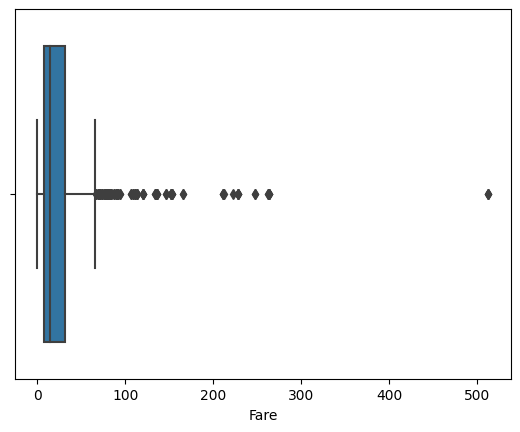

In [82]:
sns.boxplot(
    data=df,
    x="Fare"
)

### 좌석 등급별 지불 운임 박스플랏

<Axes: xlabel='Pclass', ylabel='Fare'>

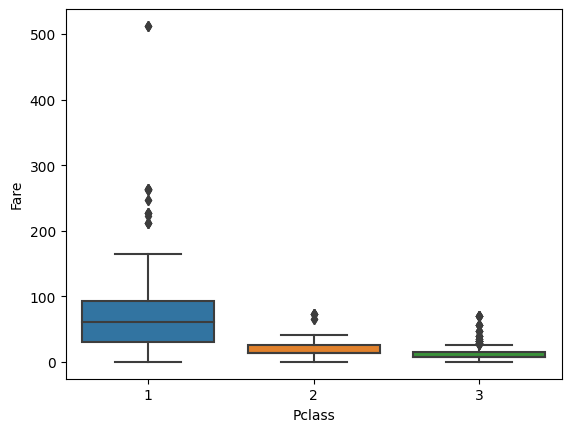

In [86]:
sns.boxplot(
    data=df,
    x="Pclass",
    y="Fare",
)

### 연습 문제

생존 여부별 연령의 박스 플랏을 그려보세요.

<Axes: xlabel='Survived', ylabel='Age'>

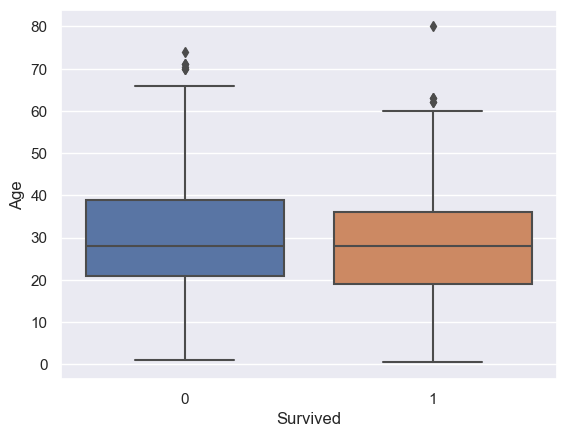

In [105]:
sns.boxplot(
    data=df,
    x="Survived",
    y="Age",
)

In [117]:
df

,Survived,cnt
0,0,549
1,1,342


In [116]:
df.describe()

,Survived,cnt
count,2.000000,2.000000
mean,0.500000,445.500000
std,0.707107,146.371104
min,0.000000,342.000000
25%,0.250000,393.750000
50%,0.500000,445.500000
75%,0.750000,497.250000
max,1.000000,549.000000


In [119]:
sql = """
SELECT
    Age,
    Survived
FROM
    titanic
"""
df = read_data(sql)
df.describe()

/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_55144/2984245492.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


,Age,Survived
count,714.000000,891.000000
mean,29.699118,0.383838
std,14.526497,0.486592
min,0.420000,0.000000
25%,20.125000,0.000000
50%,28.000000,0.000000
75%,38.000000,1.000000
max,80.000000,1.000000


<Axes: xlabel='Survived', ylabel='Age'>

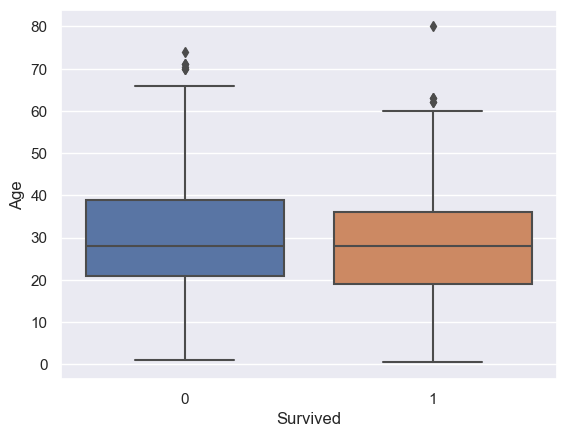

In [120]:
sns.boxplot(
    data=df,
    x="Survived",
    y="Age",
)

In [121]:
def gugudan(target):
    # 여기를 채워주세요

In [122]:
gugudan(2)

2 4 6 8 10 12 14 16 18 

In [123]:
gugudan(3)

3 6 9 12 15 18 21 24 27 

In [124]:
gugudan(4)

4 8 12 16 20 24 28 32 36 